# The Array-Backed List

## Agenda

1. The List **Abstract Data Type** (ADT)
2. A List **Data Structure**
3. The List API
4. Getting started
5. NumPy arrays
6. The `ArrayList` data structure
7. Runtime analysis

## 1. The List **Abstract Data Type** (ADT)

- An **abstract data type (ADT)** defines a *conceptual model* for how data may be stored and accessed.
    - distinction: abstract versus distinct: abstract is purely conceptual

A **list ADT** is a data container where:

- values are ordered in a *sequence*
- each value has at most one preceding and one succeeding value
- a given value may appear more than once in a list: not guaranteed uniqueness

Other common ADTs (some of which we'll explore later) include:

- Stacks
- Queues
- Priority Queues
- Maps
- Graphs


- ADT: doesnt say naything about performance or about API (methods you can use)
    - data structure is the implementation of the ADT
    

## 2. A List **Data Structure**

A **list data structure** is a *concrete implementation* of the list ADT in some programming language, which, in addition to adhering to the basic premises of the ADT, will also typically support operations that:

- access values in the list by their position (index)
- append and insert new values into the list
- remove values from the list

- The implementation of any data structure will generally rely on simpler, constituent data types (e.g., "primitive" types offered by the language), the choice of which may affect the runtime complexities of said operations.
    - example: using arrays to build array backed lists
    = example: for linked lists, need self referential data types

## 3. The List API

The operations we'll be building into our list data structures will be based on the [common](https://docs.python.org/3.6/library/stdtypes.html#common-sequence-operations) and [mutable](https://docs.python.org/3.6/library/stdtypes.html#mutable-sequence-types) sequence operations defined by the Python library.

Note: __func__ you typically call with magic method's syntactic sugar


In [ ]:
class List:        
    ### subscript-based access ###
    
    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        pass

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        pass

    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        pass
    
    ### stringification ###
            
    def __repr__(self):
        """Supports inspection"""
        return '[]'
    
    def __str__(self):
        """Implements `str(self)`"""
        return '[]'

    ### single-element manipulation ###
    
    def append(self, value):
        pass
    
    def insert(self, idx, value):
        pass
    
    def pop(self, idx=-1):
        #remove a value and return it
        pass
    
    def remove(self, value):
        pass
    
    ### predicates (T/F queries) ###
    
    def __eq__(self, other):
        """Implements `self == other`"""
        return True

    def __contains__(self, value):
        """Implements `val in self`"""
        return True
    
    ### queries ###
    
    def __len__(self):
        """Implements `len(self)`"""
        return len(self.data)
    
    def min(self):
        pass
    
    def max(self):
        pass
    
    def index(self, value, i, j):
        pass
    
    def count(self, value):
        pass

    ### bulk operations ###

    def __add__(self, other):
        """Implements `self + other_array_list`"""
        return self
    
    def clear(self):
        pass
    
    def copy(self):
        pass

    def extend(self, other):
        pass

    ### iteration ###
    
    def __iter__(self):
        """Supports iteration (via `iter(self)`)"""
        pass

## 4. Getting started

In [10]:
class List:
    def append(self, value):
        self.val = value
    
    def __getitem__(self, idx):
        #implements indexing
        # when an object is indexed, idx is passed in as a parameter, thus we can use it 
        """Implements `x = self[idx]`"""
        #right now we only have one value
        return self.val

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        #still dont have indexing
        self.val =  value
    
    def __repr__(self):
        """Supports inspection"""
        #method that gets called to return/retrieve the string representation of an object
        return f'[{repr(self.val)}]'

In [12]:
l = List()
l.append(42)

In [16]:
l # equivalent to l.__repr__(), also equivalent to repr(l)

[331]

In [14]:
l[0] # equivalent to l.__getitem__(0)

42

In [15]:
l[0] = 331 # equivalent to l.__setitem__(0, 331)

In [17]:
l[500] #we still dont have indexing implemented, so its still just returning self.val

331

In [18]:
l

[331]

Of course, we need our list implementation to hold more than a single element. The obvious solution for this is to use an *array*.

## 5. NumPy arrays

Python does not come with a built-in array type. Instead, we're going to make use of the array implementation provided by the [NumPy scientific computing package](https://numpy.org/doc/stable/user/absolute_beginners.html).

To create a NumPy array of size N, we can do:

In [21]:
import numpy as np

#create an array with N slots ( you have to carve out a fixed number of slots)
N = 10
arr = np.empty(N, dtype=object) #dtype: the data type i mean to hold in this array is the object, thus i want my array to hold references (so size doesnt matter)

arr

array([None, None, None, None, None, None, None, None, None, None],
      dtype=object)

The `dtype=object` specification indicates that we want to use the array to store references to arbitrary Python objects. The `empty` function creates an array of the specified size, but leaves all elements uninitialized.

In [22]:
for i in range(5):
    arr[i] = i

arr[0]  = 'hello'
arr[4] = 'world'

In [23]:
arr

array(['hello', 1, 2, 3, 'world', None, None, None, None, None],
      dtype=object)

In [24]:
len(arr)

10

Recall that arrays are **fixed-size**, so we cannot append, insert, or delete elements to/from them directly. These operations must be implemented by the data structure we build *on top of* the array.

- I.e., *an array is not a data structure*! It is a low-level *data storage* mechanism.
    - meant for just indexing and length getting

## 6. The `ArrayList` data structure

Our list data structure will make use of a NumPy array as its backing data store. This array will have a fixed initial size, but as elements are added to the list it may become necessary to create a new, larger backing array and copy our elements over. Each time we create a new backing array, we will *double the capacity of the original* -- this may seem arbitrary now, but we will see why it is a critical detail later on!

In [60]:
import numpy as np
# each list index corresponds to an array index, and its direct (values in list is different than slots in the array)
# but how do we grow and resize an array? There are methods but they arent always successful, so lets not do that. When we run out of slots we need to make a new array
    # option: array with one slot, every time we add an element we have to make a new array with one slot and fill it, and thus each time we do it we have to iteratively copy over
    #          the entire array
    # improvement: so how many extra slots should we carve out 
    #               reverse out way into it, simply double the size of our array
    #               analyze rigorously later on runtime performance (amoritized runtime, average case)

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object) #refers to our backing array
        self.size = 0 # number of (logical) elements in the list, NOT SLOTS IN THE BACKING ARRAY


    def append(self, value):
        if self.size == len(self.data):
            print("doubling")
            #double the size of our array
            tmpdata = np.empty(len(self.data) *2, dtype=object)
            for i in range(len(self.data)):
                tmpdata[i] = self.data[i]
            self.data = tmpdata
        self.data[self.size] = value 
        self.size +=1

    def _normalize_and_check_index(self, idx):
        assert isinstance(idx, int), 'Index must be an integer'
        #convert to a positive index
        if idx < 0:
            idx += self.size 
        if idx < 0 or idx >= self.size:
           raise IndexError("list index out of range")
        return idx


    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        idx = self._normalize_and_check_index(idx)
        return self.data[idx]
    

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        idx = self._normalize_and_check_index(idx)
        self.data[idx] = value 
        

    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        idx = self._normalize_and_check_index(idx)
        # have to move everything down starting from idx +1 
        for i in range(idx, self.size -1):
            self.data[i] = self.data[i+1]
        self.size -= 1
        #note to self we are not shrinking the array
        
    
    def __len__(self):
        """Implements `len(self)`"""
        return self.size # note: not the same as `len(self.data)`!
    
    
    def __repr__(self):
        """Supports inspection"""
        repr_elems = [repr(self.data[i]) for i in range(self.size)]
        return '[' + ', '.join(repr_elems) + ']'

In [61]:
l = ArrayList()
# 4 doubling and copying operations
# 1 -> 2 -> 4 -> 8 -> 16 -> 32 -> 64 -> 128 .... 2^i length 10, have to do 5, length 100, have to do 7, so n = log_2(n) times needed to double
for x in range(10):
    l.append(x)
l, len(l.data), l.data

doubling
doubling
doubling
doubling


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 16,
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, None, None, None, None, None, None],
       dtype=object))

In [57]:
l[5]
l[0] = 'hello'
l[-1] = 'world'
l

['hello', 1, 2, 3, 4, 5, 6, 7, 8, 'world']

In [58]:
l[2] = 'two'
l[-3] = 'seven'
l

['hello', 1, 'two', 3, 4, 5, 6, 'seven', 8, 'world']

In [59]:
del l[5]
l

['hello', 1, 'two', 3, 4, 6, 'seven', 8, 'world']

In [ ]:
del l[0]
del l[-1]
l

In [ ]:
len(l)

## 7. Runtime analysis

n is the number of logical elements
- Indexing: $O(1)$ 
    - accessing an element by reading and writing, enabled by __get_item__ method, this is constant, the operation is just to take the base + displacement computation
    - assigning is by __setitem__

- Search (unsorted): $O(n)$
    - implemented by __contains__
    - check every element, and return if you hit it, thus worst case its ats the end of the list or not in it at all

- Search (sorted, using binary search): $O(\log n)$
    - we are assuming its already sorted 
    - its necesarry that we can jump to specific elements (namely the middles) in contstant time, and we can 

- Deletion: $O(n)$
    - method is __delitem__, remember we arent shrinking the array
    - we have to access each element O(1) and then iterate over to redefine the new location
    - so if we delete k, we have to move k - 1 elements down 
    - worst case we delete the 0th element 

- Append: $O(n)$ worst case, amortized $O(1)$
    - two cases, youre filled up or youre not filled up, there is space for another 
        - not filled up, index up which is constant and add it on
        - filled up 
            - double the size of the array, and then iterate over your old array to the new one, requires n-1 copying operations
            - O(n) where n is the number of items you have 
        - but consider: as array gets bigger and bigger, the likelihood of it being filled up is lower and lower
            - more granular analysis 
                - only countring data movements, backing array of n=1
                    look at backging graphic on append and operations
                    -amortized costs, with our current procedure we are getting a lot of 1's when we have nonfilled arrays
                        - we find 3 works, why?
                            - first note: its a cosntant cost, its an amoritized constant value 
                            - this is the average cost for each element, and you have 3. Youve noticed you drop down to 3 after each new build 
                                - 3 gives us enough space to save up 
                                        -1 credit is paid to copy the element into an array (yourself)
                                        -1 credit is paid for first used to move the element over the first time (future self)
                                        - one credit is used to move the element at i-2^(log_2(i)) (another person in array under you )
- Insertion: $O(N)$
    - similiar to append, you put a new element in and everything is moved up, so you do need a new slot 
        - move k .... n elements up to make space for x 
        -   worst case, everything has to be shifted over one, this is (O(1) amortized append, +O(N) shifts)

### Not doubling?

If we chose to expand the array by a constant amount instead of doubling it, what would be the amortized runtime for append?

In [62]:
import numpy as np

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0


    def append(self, value, doubling=True):
        if self.size == len(self.data):
            if doubling:
                nsize = 2 * len(self.data)
            else:
                nsize = len(self.data) + 1000

            ndata = np.empty(nsize, dtype=object)
            for i in range(len(self.data)):
                ndata[i] = self.data[i]
            self.data = ndata
            
        self.data[self.size] = value
        self.size += 1

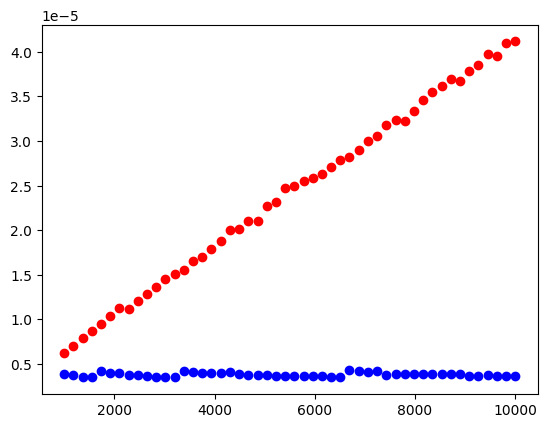

In [63]:
# plot average runtime of `append` for doubling vs. non-doubling strategies,
# as a function of the total number of elements appended

import timeit
import matplotlib.pyplot as plt

ns = np.linspace(1000, 10_000, 50, dtype=int)
ts1 = [timeit.timeit(stmt=f'for _ in range({n}):'
                          f'    lst.append(None, doubling=True)', 
                     setup='lst = ArrayList()',
                     globals=globals(), 
                     number=10) / n
       for n in ns]
ts2 = [timeit.timeit(stmt=f'for _ in range({n}): '
                          f'    lst.append(None, doubling=False)', 
                     setup='lst = ArrayList()',
                     globals=globals(), 
                     number=10) / n
       for n in ns]

plt.plot(ns, ts1, 'ob')
plt.plot(ns, ts2, 'or');

Note how doubling the array size (in blue) gives us a *constant amortized runtime*.

- Not doubling the array size (in red) gives us a *linear amortized runtime*! (We won't prove this directly, but can easily observe it.)
    - do proof yourself